# MNIST Convolutional Neural Network
We are going to build a Convolutional Neural Network to classify handwritten digits from MNIST dataset. 
This will just be a simple CNN with 2 convolutional layers and 2 hidden layers. We are later going to study more accurate sequential models. 

For this notebook we are going to use **TensorFlow** with **Keras**.

In [1]:
import tensorflow as tf 
# We don't really need to import TensorFlow here since it's handled by Keras, 
# but we do it in order to output the version we are using.

In [2]:
tf.__version__

'0.12.1'

We are using TensorFlow-GPU 0.12.1 on Python 3.5.2, running on Windows 10 with Cuda 8.0.
We have 3 machines with the same environment and 3 different GPUs, respectively with 384, 1024 and 1664 Cuda cores.

## Imports

In [3]:
from IPython.display import Image

from util import Util
u = Util()

import numpy as np
# Explicit random seed for reproducibility
np.random.seed(1337)  

Using TensorFlow backend.


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [5]:
from keras.datasets import mnist

## Definitions

In [6]:
batch_size = 128
nb_classes = 10
nb_epoch = 15
# path of the model graph
model_image_path = 'images/model_01_MNIST.png'

In [7]:
# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)
# dense layer size
dense_layer_size = 128

## Data load

In [8]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

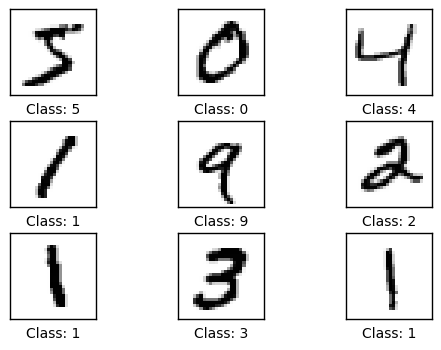

In [9]:
u.plot_images(X_train[0:9], y_train[0:9])

In [10]:
if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [12]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Model definition

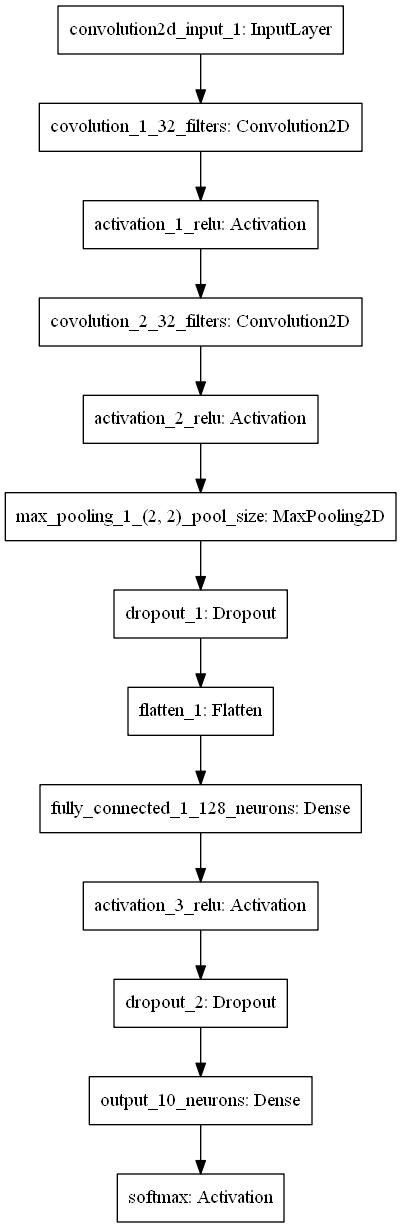

In [13]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape, name='covolution_1_' + str(nb_filters) + '_filters'))
model.add(Activation('relu', name='activation_1_relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1], name='covolution_2_' + str(nb_filters) + '_filters'))
model.add(Activation('relu', name='activation_2_relu'))
model.add(MaxPooling2D(pool_size=pool_size, name='max_pooling_1_' + str(pool_size) + '_pool_size'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(dense_layer_size, name='fully_connected_1_' + str(dense_layer_size) + '_neurons'))
model.add(Activation('relu', name='activation_3_relu'))
model.add(Dropout(0.25))
model.add(Dense(nb_classes, name='output_' + str(nb_classes) + '_neurons'))
model.add(Activation('softmax', name='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

Image(u.maybe_save_network(model, model_image_path), width=300)

## Training and evaluation

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 12s - loss: 0.3044 - acc: 0.9081 - val_loss: 0.0827 - val_acc: 0.9750
Epoch 2/15
60000/60000 [==============================] - 11s - loss: 0.0991 - acc: 0.9699 - val_loss: 0.0529 - val_acc: 0.9831
Epoch 3/15
60000/60000 [==============================] - 11s - loss: 0.0738 - acc: 0.9779 - val_loss: 0.0431 - val_acc: 0.9862
Epoch 4/15
60000/60000 [==============================] - 11s - loss: 0.0612 - acc: 0.9815 - val_loss: 0.0374 - val_acc: 0.9872
Epoch 5/15
60000/60000 [==============================] - 11s - loss: 0.0528 - acc: 0.9840 - val_loss: 0.0343 - val_acc: 0.9878
Epoch 6/15
60000/60000 [==============================] - 11s - loss: 0.0459 - acc: 0.9860 - val_loss: 0.0306 - val_acc: 0.9897
Epoch 7/15
60000/60000 [==============================] - 11s - loss: 0.0416 - acc: 0.9869 - val_loss: 0.0298 - val_acc: 0.9895
Epoch 8/15
60000/60000 [==============================

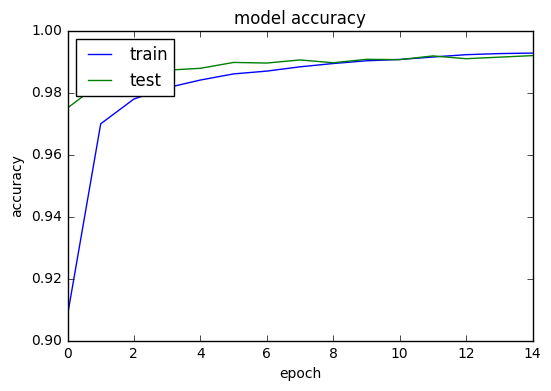

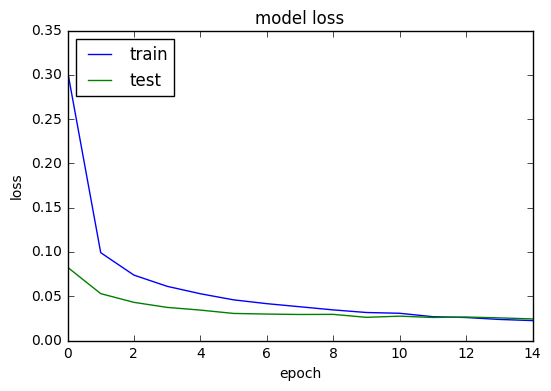

In [14]:
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

u.plot_history(history)

## Inspecting the result

 9952/10000 [============================>.] - ETA: 0s[[ 977    0    0    0    0    0    0    1    2    0]
 [   0 1128    1    1    0    0    2    2    1    0]
 [   1    0 1025    0    0    0    0    4    2    0]
 [   0    0    1 1006    0    1    0    1    1    0]
 [   0    0    0    0  978    0    1    0    0    3]
 [   2    0    0    7    0  880    1    0    1    1]
 [   6    2    0    0    1    2  944    0    3    0]
 [   0    0    5    0    0    0    0 1021    1    1]
 [   2    0    2    0    0    0    0    2  964    4]
 [   0    2    0    2    4    2    0    2    1  996]]


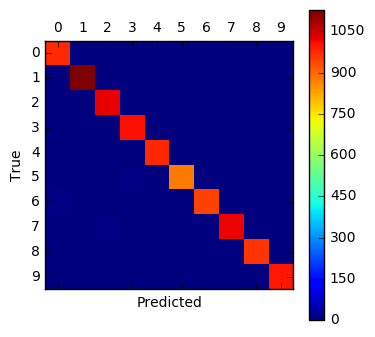

In [15]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

u.plot_confusion_matrix(y_test, nb_classes, predicted_classes)

### Examples of correct predictions

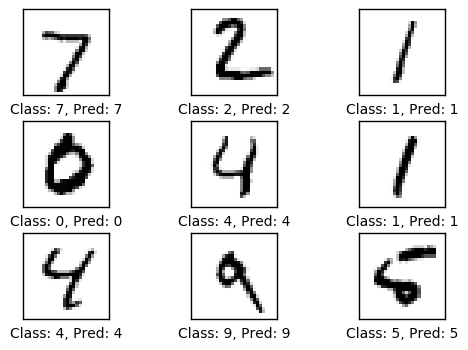

In [16]:
u.plot_images(X_test[correct_indices[:9]], y_test[correct_indices[:9]], 
              predicted_classes[correct_indices[:9]])

### Examples of incorrect predictions

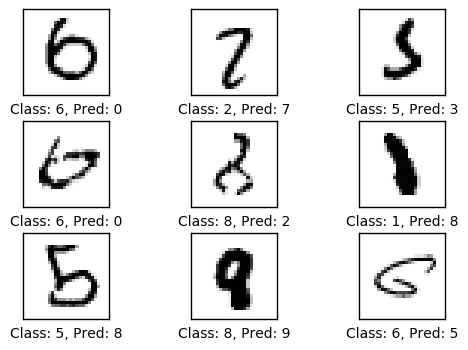

In [17]:
u.plot_images(X_test[incorrect_indices[:9]], y_test[incorrect_indices[:9]], 
              predicted_classes[incorrect_indices[:9]])

## Results
After 15 epochs running in about 11 seconds each (on our average GPU), the model reaches over 99% accuracy on the test set. 
The record for MNIST is 0.21% error, so we can still do better. 